In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.interpolate import BSpline
from tqdm import tqdm

In [54]:
import nbformat
from IPython import get_ipython

nb = nbformat.read("data_final.ipynb", as_version=4)
ip = get_ipython()
for cell in nb.cells:
    if cell.cell_type == 'code': ip.run_cell(cell.source)
labels, features_normalized,labels_origin,features_processed = ip.user_ns['labels'], ip.user_ns['features_normalized'], ip.user_ns['labels_origin'],ip.user_ns['features_processed']

DataFrame Shape: (436, 10)


,Nano Particle,Base Fluid,Temperature (°C),Volume Concentration (ϕ),Density of Nano Particle 1 (ρnp),Density of Nano Particle 2 (ρnp),Density of Base Fluid (ρbf),Volume Mixture of Particle 1,Volume Mixture of Particle 2,Density (ρ)
0,Al₂O₃/SiO₂,Water,20,0.05,3890,2220,998.29,20,80,1004.814815
1,Al₂O₃/SiO₂,Water,30,0.05,3890,2220,995.71,20,80,1002.222222
2,Al₂O₃/SiO₂,Water,40,0.05,3890,2220,992.25,20,80,997.037037
3,Al₂O₃/SiO₂,Water,50,0.05,3890,2220,988.02,20,80,994.444444
4,Al₂O₃/SiO₂,Water,60,0.05,3890,2220,983.13,20,80,990.000000


,Volume Concentration (ϕ),Density of Nano Particle 1 (ρnp),Density of Nano Particle 2 (ρnp),Density of Base Fluid (ρbf),Volume Mixture of Particle 1,Volume Mixture of Particle 2,Density (ρ)
Volume Concentration (ϕ),1.000000,-0.042983,-0.270959,-0.273470,0.582202,-0.582202,0.283905
Density of Nano Particle 1 (ρnp),-0.042983,1.000000,-0.398005,-0.248904,0.004921,-0.004921,-0.298498
Density of Nano Particle 2 (ρnp),-0.270959,-0.398005,1.000000,0.498946,-0.521510,0.521510,0.170874
Density of Base Fluid (ρbf),-0.273470,-0.248904,0.498946,1.000000,-0.401379,0.401379,0.773982
Volume Mixture of Particle 1,0.582202,0.004921,-0.521510,-0.401379,1.000000,-1.000000,-0.029027
Volume Mixture of Particle 2,-0.582202,-0.004921,0.521510,0.401379,-1.000000,1.000000,0.029027
Density (ρ),0.283905,-0.298498,0.170874,0.773982,-0.029027,0.029027,1.000000


In [55]:
print(features_processed[1], features_normalized[1], labels[1], labels_origin[1])

[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 3.0000e+01 5.0000e-02 3.8900e+03 2.2200e+03 9.9571e+02 2.0000e+01] [ 0.          0.          0.          0.          1.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          1.
 -0.48148148 -0.95       -0.78619756 -0.84102564 -0.57587822 -0.9047619 ] [-0.65202184] 1002.222222


In [56]:
import numpy as np

features_train = features_normalized
labels_train = labels

num_samples = 40
indices = np.random.choice(len(features_train), num_samples, replace=False)


features_test = features_train[indices]
labels_test = labels_train[indices]

features_train = np.delete(features_train, indices, axis=0)
labels_train = np.delete(labels_train, indices, axis=0)

print("Размер train:", features_train.shape, labels_train.shape)
print("Размер test:", features_test.shape, labels_test.shape)


Размер train: (396, 24) (396, 1)
Размер test: (40, 24) (40, 1)


In [5]:
def ReLU(x, derivative=False):
    return x * (x > 0) if not derivative else 1.0 * (x >= 0)

def tanh(x, derivative=False):
    if not derivative:
        return math.tanh(x)
    return 1 - math.tanh(x) ** 2

def identity(x, derivative=False):
    if not derivative:
        return x
    return 1

In [7]:
class Neuron:
    def __init__(self, n, weights_lim=None, activation=ReLU):
        self.n = n
        self.n_weights_on_edge = 1
        self.weights = np.random.uniform(
            *([-1, 1] if weights_lim is None else weights_lim),
            size=(self.n, 1)
        )
        self.bias = 0
        self.activation = activation

        
        activation_name = getattr(activation, '__name__', str(activation))
        print(f"Creating neuron with activation: {activation_name}")
        
        self.x_in = None
        self.x_mid = None
        self.x_out = None
        self.activationput = None
        self.dx_out__dx_mid = None
        self.dx_out__dbias = None
        self.dx_mid__dw = None
        self.dx_mid__dx_in = None
        self.dx_out__dx_in = None
        self.dx_out__dw = None
        self.dloss_dw = np.zeros((self.n, 1))
        self.dloss_dbias = 0


    def __call__(self, x_in):
        self.x_in = np.array(x_in)
        self.x_mid = self.weights[:, 0] * self.x_in
        self.activationput = sum(self.x_mid.flatten()) + self.bias
        self.x_out = self.activation(self.activationput, derivative=False)
        self.dx_out__dx_mid = self.activation(self.activationput, derivative=True) * np.ones(self.n)
        self.dx_out__dbias = self.activation(self.activationput, derivative=True)
        self.dx_mid__dw = np.reshape(self.x_in, (-1, 1))
        self.dx_mid__dx_in = self.weights.flatten()
        self.dx_out__dx_in = self.dx_out__dx_mid * self.dx_mid__dx_in
        self.dx_out__dw = np.diag(self.dx_out__dx_mid) @ self.dx_mid__dw
        return self.x_out

    def update_dloss_dw_dbias(self, dloss_dxout):
        self.dloss_dw += self.dx_out__dw * dloss_dxout
        self.dloss_dbias += self.dx_out__dbias * dloss_dxout

    def gradient_descent(self, eps, n_samples):
        self.weights -= eps * self.dloss_dw / n_samples
        self.bias -= eps * self.dloss_dbias / n_samples

In [8]:
def B_splines(x_limits, n_functions, degree=3, **kwargs):
    grid_len = n_functions - degree + 1
    step = (x_limits[1] - x_limits[0]) / (grid_len - 1)
    edge_fun, edge_fun_der = {}, {}

    edge_fun[0] = lambda x: x / (1 + np.exp(-x))
    edge_fun_der[0] = lambda x: (1 + np.exp(-x) + x * np.exp(-x)) / np.power((1 + np.exp(-x)), 2)
    
    k = np.linspace(x_limits[0] - degree * step, x_limits[1] + degree * step, grid_len + 2 * degree)
    k[degree], k[-degree - 1] = x_limits[0], x_limits[1]
    for ind_spline in range(n_functions - 1):
        edge_fun[ind_spline + 1] = BSpline.basis_element(k[ind_spline:ind_spline + degree + 2], extrapolate=False)
        edge_fun_der[ind_spline + 1] = edge_fun[ind_spline + 1].derivative()
    return edge_fun, edge_fun_der

In [10]:
class Neuron_Kolmagorov:
    
    def __init__(self, n, n_weights_on_edge, x_limits, activation=tanh, weights_lim=None, get_edge_fun=B_splines,**kwargs):
        self.n = n
        self.n_weights_on_edge = n_weights_on_edge
        self.x_limits = x_limits
        self.activation = activation
        
        activation_name = getattr(activation, '__name__', str(activation))
        print(f"Creating neuron with activation: {activation_name}")
            
        self.weights = np.random.uniform(
            *([-1, 1] if weights_lim is None else weights_lim),
            size=(self.n, self.n_weights_on_edge)
        )
        self.edge_fun, self.edge_fun_der = get_edge_fun(self.x_limits, self.n_weights_on_edge, **kwargs)
        
        self.x_in = None
        self.x_mid = None
        self.x_out = None
        self.phi_x_mat = None
        self.dx_out__dx_mid = None
        self.dx_out__dbias = None
        self.dx_mid__dw = None
        self.dx_mid__dx_in = None
        self.dx_out__dx_in = None
        self.dx_out__dw = None
        self.dloss_dw = np.zeros((self.n, self.n_weights_on_edge))
        self.dloss_dbias = 0

    def __call__(self, x_in):
        self.x_in = np.array(x_in)
        self.phi_x_mat = np.array([self.edge_fun[b](self.x_in) for b in self.edge_fun]).T
        self.phi_x_mat[np.isnan(self.phi_x_mat)] = 0
        self.x_mid = (self.weights * self.phi_x_mat).sum(axis=1)
        self.activationput = sum(self.x_mid.flatten())
        self.x_out = self.activation(self.activationput, derivative=False)
        
        self.dx_out__dx_mid = self.activation(sum(self.x_mid.flatten()),derivative=True) * np.ones(self.n)
        self.dx_mid__dw = self.phi_x_mat
        phi_x_der_mat = np.array([
            self.edge_fun_der[b](self.x_in) if self.edge_fun[b](self.x_in) is not None else 0
            for b in self.edge_fun_der
        ]).T
        phi_x_der_mat[np.isnan(phi_x_der_mat)] = 0
        self.dx_mid__dx_in = (self.weights * phi_x_der_mat).sum(axis=1)
        self.dx_out__dx_in = self.dx_out__dx_mid * self.dx_mid__dx_in
        self.dx_out__dw = np.dot(np.diag(self.dx_out__dx_mid), self.dx_mid__dw)
        
        return self.x_out

    def update_dloss_dw_dbias(self, dloss_dxout):
        self.dloss_dw += self.dx_out__dw * dloss_dxout

    def gradient_descent(self, eps, n_samples):
        self.weights -= eps * self.dloss_dw / n_samples

In [11]:
class Neuron_Mixed:
    
    def __init__(self, num_kan, num_norm, activation, n_weights_on_edge, x_limits, weights_lim=None, get_edge_fun=B_splines, **kwargs):
        self.num_kan = num_kan
        self.num_norm = num_norm
        self.activation = activation

        activation_name = getattr(activation, '__name__', str(activation))
        print(f"Creating neuron with activation: {activation_name}")
        
        self.n_weights_on_edge = n_weights_on_edge
        self.x_limits = x_limits
        self.weights_kan = np.random.uniform(
            *([-1, 1] if weights_lim is None else weights_lim),
            size=(num_kan, self.n_weights_on_edge)
        )
        self.weights_norm = np.random.uniform(
            *([-1, 1] if weights_lim is None else weights_lim),
            size=(num_norm, 1)
        )
        self.edge_fun, self.edge_fun_der = get_edge_fun(self.x_limits, self.n_weights_on_edge, **kwargs)

        self.dloss_dw_kan = np.zeros((self.num_kan, self.n_weights_on_edge))
        self.dloss_dw_norm = np.zeros((self.num_norm, 1))

    def __call__(self, x_in):
        assert self.num_kan + self.num_norm == len(x_in)
        self.x_in = np.array(x_in)
        self.phi_x_mat = np.array([self.edge_fun[b](self.x_in[:self.num_kan]) for b in self.edge_fun]).T
        self.phi_x_mat[np.isnan(self.phi_x_mat)] = 0
        
        self.x_mid_kan = (self.weights_kan * self.phi_x_mat).sum(axis=1)
        self.x_mid_norm = (self.weights_norm[:, 0] * self.x_in[self.num_kan:])
        self.activationput = sum(self.x_mid_kan.flatten()) + sum(self.x_mid_norm.flatten())
        self.x_out = self.activation(self.activationput, derivative=False)
        
        self.dx_out__dx_mid = self.activation(self.activationput, derivative=True) * np.ones(self.num_kan + self.num_norm)
        self.dx_mid__dw_kan = self.phi_x_mat
        self.dx_mid__dw_norm = self.x_in[self.num_kan:]
        phi_x_der_mat = np.array([
            self.edge_fun_der[b](self.x_in[:self.num_kan]) if self.edge_fun[b](self.x_in[:self.num_kan]) is not None else 0
            for b in self.edge_fun_der
        ]).T
        phi_x_der_mat[np.isnan(phi_x_der_mat)] = 0
        self.dx_mid__dx_in_kan = (self.weights_kan * phi_x_der_mat).sum(axis=1)
        self.dx_mid__dx_in_norm = self.weights_norm.flatten()
        self.dx_out__dx_in = self.dx_out__dx_mid * np.hstack([self.dx_mid__dx_in_kan, self.dx_mid__dx_in_norm])
        self.dx_out__dw_kan = np.diag(self.dx_out__dx_mid[:self.num_kan]) @ self.dx_mid__dw_kan
        self.dx_out__dw_norm = np.diag(self.dx_out__dx_mid[self.num_kan:]) @ self.dx_mid__dw_norm
        
        return self.x_out

    def update_dloss_dw_dbias(self, dloss_dxout):
        self.dloss_dw_kan += self.dx_out__dw_kan * dloss_dxout
        self.dloss_dw_norm += self.dx_out__dw_norm.reshape(-1,1) * dloss_dxout

    def gradient_descent(self, eps, n_samples):
        self.weights_kan -= eps * self.dloss_dw_kan / n_samples
        self.weights_norm -= eps * self.dloss_dw_norm / n_samples

In [12]:
def squared_loss(y, y_train, derivative=False):
    diff = y - y_train
    if not derivative:
        loss = np.sum(diff * diff)
        return loss
    else:
        return 2 * diff

In [13]:
class Layers:
    
    def __init__(self, n, n_out, neuron_class=Neuron, **kwargs):
        self.n = n
        self.n_out = n_out
        self.neurons = [
            neuron_class(n, **kwargs) 
            for _ in range(n_out)
        ]
        self.x_in = None  
        self.x_out = None 
        self.dloss_dxin = None  
        self.zero_grad()

    def __call__(self, x_in):
        self.x_in = x_in
        self.x_out = np.array([nn(self.x_in) for nn in self.neurons])
        return self.x_out

    def zero_grad(self, which=None):
        if which is None:
            which = ['x_in', 'weights', 'bias']
        for w in which:
            if w == 'x_in': 
                self.dloss_dxin = np.zeros(self.n)
            elif w == 'weights':
                for nn in self.neurons:
                    nn.dloss_dw = np.zeros((self.n, nn.n_weights_on_edge))
            elif w == 'bias':
                for nn in self.neurons:
                    nn.dloss_dbias = 0
            else:
                raise ValueError('input \'which\' value not recognized')

    
    def update_grad(self, dloss_dxout):
        for ii, dloss_dxout_tmp in enumerate(dloss_dxout):
            self.dloss_dxin += self.neurons[ii].dx_out__dx_in * dloss_dxout_tmp
            self.neurons[ii].update_dloss_dw_dbias(dloss_dxout_tmp)
        return self.dloss_dxin


In [14]:
class HybridLayer:

    def __init__(self, n_inputs, n_units, num_kan, num_norm, kan_kwargs, activation, weights_lim=None):
        """
        n_inputs: общее число входов # do we need it anywhere?
        n_units: число нейронов в слое
        num_kan: сколько входов обрабатывать KAN-нейронами
        num_norm: сколько входов обрабатывать обычными нейронами
        kan_kwargs: параметры для KAN-части
        """
        assert num_kan + num_norm == n_inputs, "KAN + Norm = n_inputs"
        
        self.num_kan = num_kan
        self.num_norm = num_norm
        self.n_units = n_units
        self.weights_lim= weights_lim
        self.activation =activation
        # Создаем гибридные нейроны
        self.neurons = []
        for _ in range(n_units):
            neuron = Neuron_Mixed(
                num_kan=num_kan,
                num_norm=num_norm,
                activation=activation,
                n_weights_on_edge=kan_kwargs['n_weights_on_edge'],
                x_limits=kan_kwargs['x_limits'],
                weights_lim = weights_lim
            )
            self.neurons.append(neuron)
            
        self.dloss_dxin = np.zeros(n_inputs)
    
    def __call__(self, x):
        return np.array([neuron(x) for neuron in self.neurons])
    
    def zero_grad(self, which=None):
        if which is None:
            which = ['x_in', 'weights']  # По умолчанию сбрасываем всё
        
        if 'x_in' in which:
            self.dloss_dxin.fill(0)
        
        if 'weights' in which:
            for neuron in self.neurons:
                neuron.dloss_dw_kan.fill(0)
                neuron.dloss_dw_norm.fill(0)


    
    def update_grad(self, dloss_dxout):
        for i, neuron in enumerate(self.neurons):
            grad = neuron.dx_out__dx_in * dloss_dxout[i]
            self.dloss_dxin += grad
            neuron.update_dloss_dw_dbias(dloss_dxout[i])
        return self.dloss_dxin


In [15]:
class Network:
    def __init__(self, layer_sizes, hybrid_params, kan_kwargs, loss_f=squared_loss):
        """
        layer_sizes: список размеров слоев [input, h1, h2, ..., output]
        hybrid_params: параметры гибридного слоя {
            'num_kan': int,
            'num_norm': int,
            'activation': func,
            'weights_lim': list [min, max] (опционально)
        }
        kan_kwargs: параметры KAN-нейронов {
            'n_weights_on_edge': int,
            'x_limits': [min, max],
            'activation': func
        }
        """
        self.n_layers = len(layer_sizes)
        self.layer_sizes = layer_sizes
        self.layers = []
        self.loss_f = loss_f
        self.weights_lim = hybrid_params.get('weights_lim', [-1, 1])  # Значение по умолчанию
        
        # Первый слой - гибридный
        self.layers.append(HybridLayer(
            n_inputs=layer_sizes[0],
            n_units=layer_sizes[1],
            num_kan=hybrid_params['num_kan'],
            num_norm=hybrid_params['num_norm'],
            weights_lim=self.weights_lim,
            activation=hybrid_params['activation'],
            kan_kwargs=kan_kwargs
        ))
        
        # Последующие слои - только KAN
        for i in range(1, self.n_layers-1):
            layer_kwargs = kan_kwargs.copy()
            if (i == self.n_layers - 2):
                layer_kwargs['activation'] = identity
            self.layers.append(Layers(
                n=layer_sizes[i],
                n_out=layer_sizes[i+1],
                neuron_class=Neuron_Kolmagorov,
                **layer_kwargs
            ))
    
    def __call__(self, x):
        x_in = x
        for layer in self.layers:
            x_in = layer(x_in)
        return x_in
    
    def train(self, x_train, y_train, x_val=None, y_val=None, eps=0.1, n_iter_max=1000, 
              loss_tol=0.1, decay_rate=0.995, min_lr=0.0001, patience=30, 
              plateau_factor=0.5, batch_size=None):
        """
        Параметры:
        x_val, y_val: валидационные данные (если None, валидация не проводится)
        batch_size: если None - обучение по всем данным, иначе - размер батча
        """
        
        self.eps = eps
        self.initial_eps = eps
        self.loss_hist = []
        self.val_loss_hist = [] if x_val is not None else None
        x_train, y_train = np.array(x_train), np.array(y_train)
        
        assert x_train.shape[0] == y_train.shape[0], "Number of samples in x_train and y_train must match"
        assert x_train.shape[1] == self.layer_sizes[0], f"Input dimension {x_train.shape[1]} must match network input size {self.layer_sizes[0]}"
        if x_val is not None:
            x_val, y_val = np.array(x_val), np.array(y_val)
            assert x_val.shape[0] == y_val.shape[0], "Number of samples in x_val and y_val must match"

        
        n_samples = x_train.shape[0]
        if batch_size is None or batch_size >= n_samples:
            batch_size = n_samples
            n_batches = 1
        else:
            n_batches = int(np.ceil(n_samples / batch_size))

        # Трекер лучшего значения потерь
        best_loss = float('inf')
        no_improve_count = 0
        
        pbar = tqdm(range(n_iter_max))
        for it in pbar:
            # Перемешиваем данные в начале каждой эпохи
            indices = np.random.permutation(n_samples)
            x_shuffled = x_train[indices]
            y_shuffled = y_train[indices]
            
            epoch_loss = 0
            
            for batch_idx in range(n_batches):
                # Выбираем батч
                start = batch_idx * batch_size
                end = min((batch_idx + 1) * batch_size, n_samples)
                x_batch = x_shuffled[start:end]
                y_batch = y_shuffled[start:end]
                
                batch_loss = 0
                
                # Forward и backward pass для батча
                for ii in range(x_batch.shape[0]):
                    x_out = self(x_batch[ii, :])  # forward pass
                    batch_loss += self.loss_f(x_out, y_batch[ii, :])  # accumulate loss
                    self.backprop(x_out, y_batch[ii, :])  # backward propagation
                    [layer.zero_grad(which=['x_in']) for layer in self.layers]  # reset gradient wrt xin to zero
                
                # Обновление весов после каждого батча
                for ll in self.layers:
                    for nn in ll.neurons:
                        nn.gradient_descent(self.eps, x_batch.shape[0])
                [layer.zero_grad(which=['weights', 'bias']) for layer in self.layers]
                
                epoch_loss += batch_loss
            
            # Расчет среднего loss за эпоху
            current_loss = epoch_loss / n_samples
            self.loss_hist.append(current_loss)
            
            # Расчет ошибки на валидационной выборке
            if x_val is not None:
                val_loss = 0
                for ii in range(x_val.shape[0]):
                    x_out = self(x_val[ii, :])
                    val_loss += self.loss_f(x_out, y_val[ii, :])
                current_val_loss = val_loss / x_val.shape[0]
                self.val_loss_hist.append(current_val_loss)
            
            # Обновление learning rate (домножение на decay_rate)
            self.eps = max(self.eps * decay_rate, min_lr)
            
            # Адаптация при плато (используем val_loss если есть, иначе train loss)
            monitor_loss = current_val_loss if x_val is not None else current_loss
            if monitor_loss < best_loss:
                best_loss = monitor_loss
                no_improve_count = 0
            else:
                no_improve_count += 1
                if no_improve_count >= patience:
                    self.eps *= plateau_factor
                    no_improve_count = 0
                    pbar.write(f"Plateau detected. New LR: {self.eps:.2e}")
            
            # Отображение прогресса
            postfix = {'lr': f"{self.eps:.2e}", 'train_loss': f"{current_loss:.3f}"}
            if x_val is not None:
                postfix['val_loss'] = f"{current_val_loss:.3f}"
            pbar.set_postfix(postfix)
            
            # Проверка критерия остановки
            if current_loss < loss_tol:
                pbar.set_postfix_str(f'train_loss: {current_loss:.3f}. Convergence attained!')
                break
    
    def plot_loss_history(self):
        """Строит график истории ошибок обучения и валидации"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.loss_hist, label='Train Loss', color='blue')
        if self.val_loss_hist is not None:
            plt.plot(self.val_loss_hist, label='Validation Loss', color='orange')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def backprop(self, y_pred, y_true):
        """
        Параметры:
        y_pred - выход сети (может быть [array([x]), array([y]) или array([x])]
        y_true - аналогичный формат
        """
        y_pred = np.asarray(y_pred).flatten()
        y_true = np.asarray(y_true).flatten()
        
        if y_pred.shape != y_true.shape:
            raise ValueError(f"Shape mismatch in backprop: y_pred {y_pred.shape}, y_true {y_true.shape}")

        try:
            grad = self.loss_f(y_pred, y_true, derivative=True)
        except Exception as e:
            raise RuntimeError(f"Error in loss function: {str(e)}") from e
        
        # Обеспечиваем правильную размерность градиента
        grad = np.asarray(grad).reshape(-1)  # Гарантируем 1D array
        
        # Распространение градиента через слои
        delta = self.layers[-1].update_grad(grad)
        for layer in reversed(self.layers[:-1]):
            delta = layer.update_grad(delta)
        
        return delta

In [16]:
class Network_basic:
    def __init__(self, layer_sizes, activation=ReLU, loss_f=squared_loss, kan_kwargs=None):
        """
        layer_sizes: список размеров слоев [input, h1, h2, ..., output]
        kan_kwargs: параметры KAN-нейронов {
            'n_weights_on_edge': int,
            'x_limits': [min, max],
            'activation': func
        }
        """
        self.n_layers = len(layer_sizes)
        self.layer_sizes = layer_sizes
        self.layers = []
        self.loss_f = loss_f
        self.activation = activation
        neuron_kwargs = {'activation': self.activation}
        
        if kan_kwargs is not None:
            for i in range(0, self.n_layers-1):
                layer_kwargs = kan_kwargs.copy()
                if (i == self.n_layers - 2):
                    layer_kwargs['activation'] = identity
                self.layers.append(Layers(
                    n=layer_sizes[i],
                    n_out=layer_sizes[i+1],
                    neuron_class=Neuron_Kolmagorov,
                    **layer_kwargs
                ))
        else:
            for i in range(0, self.n_layers-1):
                if (i == self.n_layers - 2):
                    neuron_kwargs['activation'] = identity
                self.layers.append(Layers(
                    n=layer_sizes[i],
                    n_out=layer_sizes[i+1],
                    neuron_class=Neuron,
                    **neuron_kwargs
                ))
    
    def __call__(self, x):
        x_in = x
        for layer in self.layers:
            x_in = layer(x_in)
        return x_in
    
    def train(self, x_train, y_train, x_val=None, y_val=None, eps=0.1, n_iter_max=1000, 
              loss_tol=0.1, decay_rate=0.995, min_lr=0.0001, patience=30, 
              plateau_factor=0.5, batch_size=None):
        """
        Параметры:
        x_val, y_val: валидационные данные (если None, валидация не проводится)
        batch_size: если None - обучение по всем данным, иначе - размер батча
        """
        # Инициализация
        self.eps = eps
        self.initial_eps = eps
        self.loss_hist = [] 
        self.val_loss_hist = [] if x_val is not None else None
        x_train, y_train = np.array(x_train), np.array(y_train)
        
        assert x_train.shape[0] == y_train.shape[0], "Number of samples in x_train and y_train must match"
        assert x_train.shape[1] == self.layer_sizes[0], f"Input dimension {x_train.shape[1]} must match network input size {self.layer_sizes[0]}"
        if x_val is not None:
            x_val, y_val = np.array(x_val), np.array(y_val)
            assert x_val.shape[0] == y_val.shape[0], "Number of samples in x_val and y_val must match"

        n_samples = x_train.shape[0]
        if batch_size is None or batch_size >= n_samples:
            batch_size = n_samples
            n_batches = 1
        else:
            n_batches = int(np.ceil(n_samples / batch_size))


        best_loss = float('inf')
        no_improve_count = 0
        
        pbar = tqdm(range(n_iter_max))
        for it in pbar:
            # Перемешиваем данные в начале каждой эпохи
            indices = np.random.permutation(n_samples)
            x_shuffled = x_train[indices]
            y_shuffled = y_train[indices]
            
            epoch_loss = 0
            
            for batch_idx in range(n_batches):
                # Выбираем батч
                start = batch_idx * batch_size
                end = min((batch_idx + 1) * batch_size, n_samples)
                x_batch = x_shuffled[start:end]
                y_batch = y_shuffled[start:end]
                
                batch_loss = 0
                
                # Forward и backward pass для батча
                for ii in range(x_batch.shape[0]):
                    x_out = self(x_batch[ii, :])  # forward pass
                    batch_loss += self.loss_f(x_out, y_batch[ii, :])  # accumulate loss
                    self.backprop(x_out, y_batch[ii, :])  # backward propagation
                    [layer.zero_grad(which=['x_in']) for layer in self.layers]  # reset gradient wrt xin to zero
                
                # Обновление весов после каждого батча
                for ll in self.layers:
                    for nn in ll.neurons:
                        nn.gradient_descent(self.eps, x_batch.shape[0])
                [layer.zero_grad(which=['weights', 'bias']) for layer in self.layers]
                
                epoch_loss += batch_loss
            
            
            current_loss = epoch_loss / n_samples
            self.loss_hist.append(current_loss)
            
            # Расчет ошибки на валидационной выборке
            if x_val is not None:
                val_loss = 0
                for ii in range(x_val.shape[0]):
                    x_out = self(x_val[ii, :])
                    val_loss += self.loss_f(x_out, y_val[ii, :])
                current_val_loss = val_loss / x_val.shape[0]
                self.val_loss_hist.append(current_val_loss)
            
            # Обновление learning rate
            self.eps = max(self.eps * decay_rate, min_lr)
            
            monitor_loss = current_val_loss if x_val is not None else current_loss
            if monitor_loss < best_loss:
                best_loss = monitor_loss
                no_improve_count = 0
            else:
                no_improve_count += 1
                if no_improve_count >= patience:
                    self.eps *= plateau_factor
                    no_improve_count = 0
                    pbar.write(f"Plateau detected. New LR: {self.eps:.2e}")
            
            
            postfix = {'lr': f"{self.eps:.2e}", 'train_loss': f"{current_loss:.3f}"}
            if x_val is not None:
                postfix['val_loss'] = f"{current_val_loss:.3f}"
            pbar.set_postfix(postfix)
            
           
            if current_loss < loss_tol:
                pbar.set_postfix_str(f'train_loss: {current_loss:.3f}. Convergence attained!')
                break
    
    def plot_loss_history(self):
        """Строит график истории ошибок обучения и валидации"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.loss_hist, label='Train Loss', color='blue')
        if self.val_loss_hist is not None:
            plt.plot(self.val_loss_hist, label='Validation Loss', color='orange')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def backprop(self, y_pred, y_true):
        """Реализация backprop (остается без изменений)"""
        y_pred = np.asarray(y_pred).flatten()
        y_true = np.asarray(y_true).flatten()
        
        if y_pred.shape != y_true.shape:
            raise ValueError(f"Shape mismatch in backprop: y_pred {y_pred.shape}, y_true {y_true.shape}")

        try:
            grad = self.loss_f(y_pred, y_true, derivative=True)
        except Exception as e:
            raise RuntimeError(f"Error in loss function: {str(e)}") from e
        
        grad = np.asarray(grad).reshape(-1)
        delta = self.layers[-1].update_grad(grad)
        for layer in reversed(self.layers[:-1]):
            delta = layer.update_grad(delta)
        
        return delta

In [57]:
model_hybrid=Network(
        layer_sizes= [24, 20, 2, 1],
        hybrid_params={
            'num_kan': 6,
            'num_norm': 18,
            'weights_lim':[-1,1],
            'activation': tanh
        },
        kan_kwargs={
            'n_weights_on_edge': 7,
            'x_limits': [-1, 1],
            'activation': tanh
        }
)

Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: identity


In [58]:
model_2 = Network_basic(
    layer_sizes=[24,20,2,1],
    activation = tanh
)

Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: identity


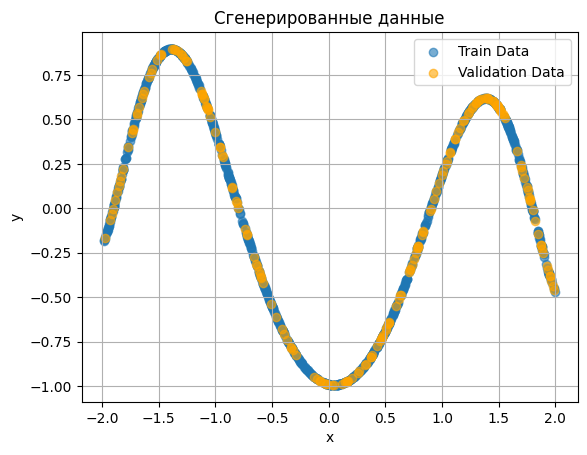

In [42]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x_train = np.random.uniform(-2, 2, 1000)
y_train = np.sin(x_train**2) + np.cos(x_train+3)

x_val = np.random.uniform(-2, 2, 200)
y_val = np.sin(x_val**2) + np.cos(x_val+3)

# Визуализация данных
plt.scatter(x_train, y_train, label="Train Data", alpha=0.6)
plt.scatter(x_val, y_val, label="Validation Data", alpha=0.6, color='orange')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.title("Сгенерированные данные")
plt.show()


In [47]:
model_kan = Network_basic( # для np.sin(x**2) + np.cos(x+3)
    layer_sizes=[1,5,1],
    kan_kwargs={        
    'n_weights_on_edge': 7,
    'x_limits': [-1, 1],
    'activation': tanh
    }
)

Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: identity


In [48]:
model_perc = Network_basic( # для np.sin(x**2) + np.cos(x+3)
    layer_sizes=[1,5,1],
    activation = tanh
)

Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: tanh
Creating neuron with activation: identity


In [49]:
model_perc.train(x_train.reshape(-1,1), y_train.reshape(-1,1), 
            x_val=x_val.reshape(-1,1), y_val=y_val.reshape(-1,1),
            eps=0.13, n_iter_max=500, loss_tol=0.030,
            decay_rate=0.995, min_lr=0.0001,
            patience=20, plateau_factor=0.5, batch_size=50)

 12%|████▊                                  | 61/500 [00:24<02:55,  2.50it/s, train_loss: 0.029. Convergence attained!]


In [50]:
model_kan.train(x_train.reshape(-1,1), y_train.reshape(-1,1), 
            x_val=x_val.reshape(-1,1), y_val=y_val.reshape(-1,1),
            eps=0.13, n_iter_max=500, loss_tol=0.030,
            decay_rate=0.995, min_lr=0.0001,
            patience=20, plateau_factor=0.5, batch_size=50)

  1%|▏                                       | 3/500 [00:08<22:31,  2.72s/it, train_loss: 0.028. Convergence attained!]


In [59]:
model_2.train(features_train, labels_train.reshape(-1,1), 
            x_val=features_test, y_val=labels_test.reshape(-1,1),
            eps=0.1, n_iter_max=500,loss_tol=0.015,
            decay_rate=0.997,
            min_lr=0.001,
            patience=20,
            plateau_factor=0.5, batch_size=38)

  8%|███▏                                   | 41/500 [00:14<02:37,  2.92it/s, train_loss: 0.015. Convergence attained!]


In [60]:
model_hybrid.train(np.hstack((features_train[:,18:], features_train[:,:18])), labels_train.reshape(-1,1), 
            x_val=np.hstack((features_test[:,18:], features_test[:,:18])), y_val=labels_test.reshape(-1,1),
            eps=0.1, n_iter_max=500,loss_tol=0.015,
            decay_rate=0.997, 
            min_lr=0.0001,
            patience=20,
            plateau_factor=0.5, batch_size=38)

 15%|████▉                             | 73/500 [02:29<14:20,  2.02s/it, lr=4.02e-02, train_loss=0.019, val_loss=0.030]

Plateau detected. New LR: 4.02e-02


 19%|██████▎                           | 93/500 [03:09<13:51,  2.04s/it, lr=1.89e-02, train_loss=0.017, val_loss=0.032]

Plateau detected. New LR: 1.89e-02


 23%|███████▍                         | 113/500 [03:50<12:59,  2.01s/it, lr=8.90e-03, train_loss=0.015, val_loss=0.032]

Plateau detected. New LR: 8.90e-03


 27%|████████▊                        | 133/500 [04:32<12:36,  2.06s/it, lr=4.19e-03, train_loss=0.015, val_loss=0.031]

Plateau detected. New LR: 4.19e-03


 27%|██████████▎                           | 136/500 [04:40<12:31,  2.06s/it, train_loss: 0.015. Convergence attained!]


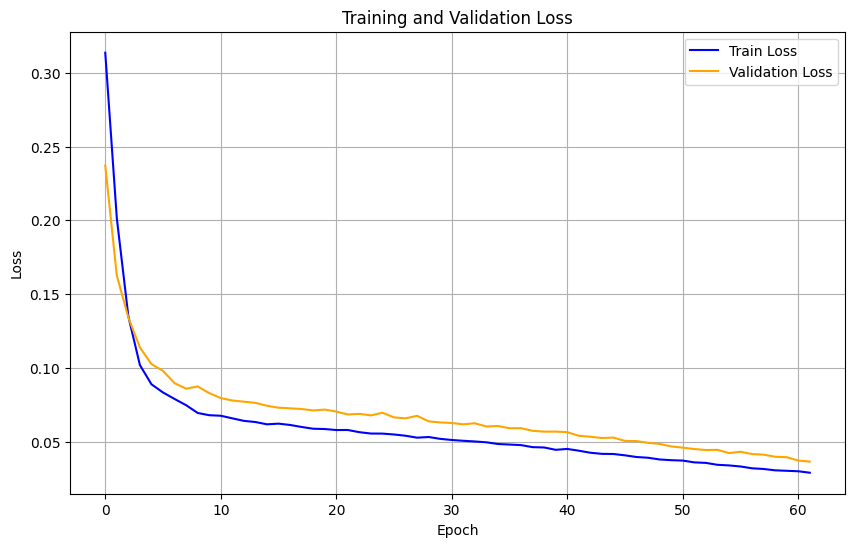

In [61]:
model_perc.plot_loss_history()

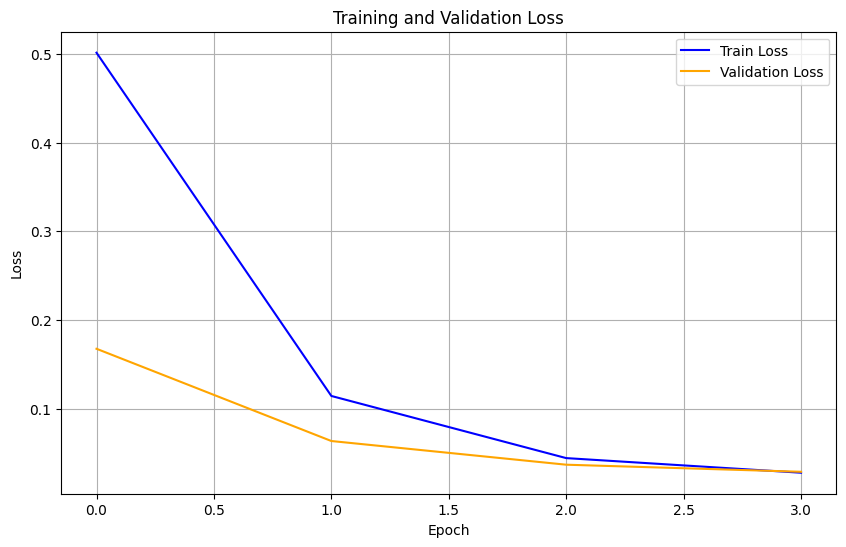

In [62]:
model_kan.plot_loss_history()

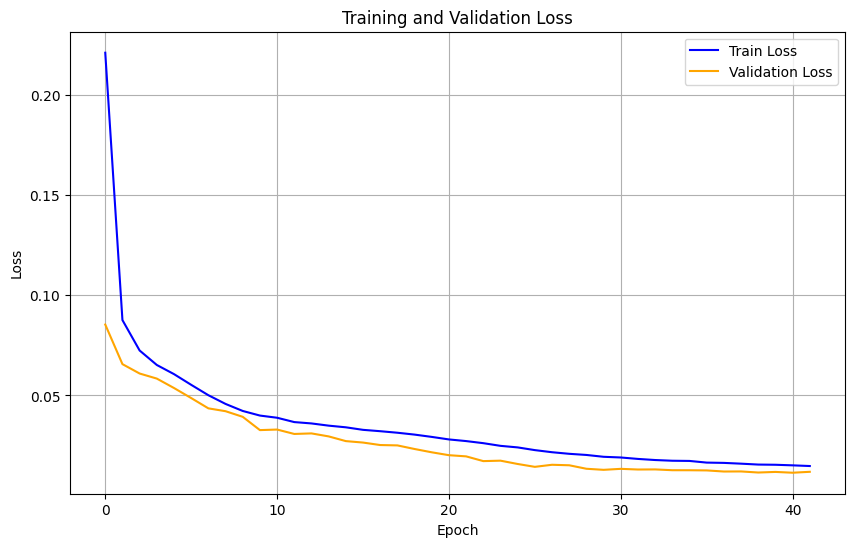

In [63]:
model_2.plot_loss_history()

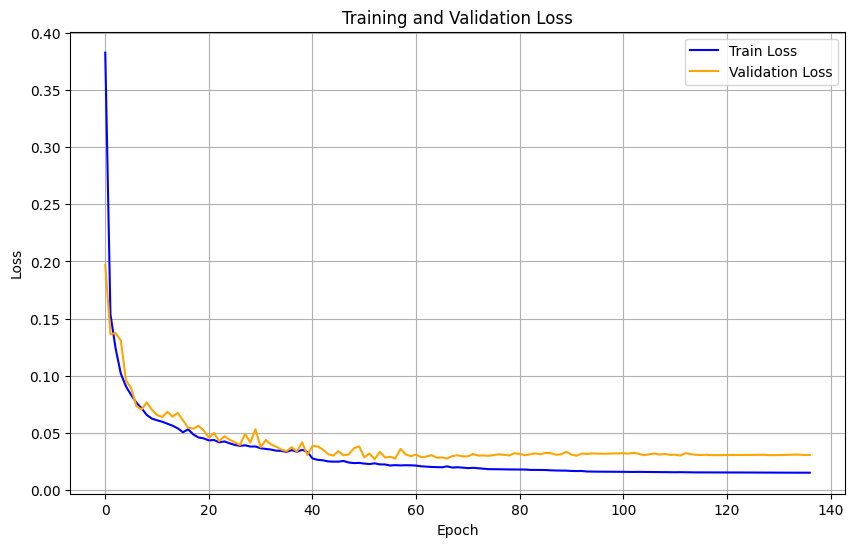

In [64]:
model_hybrid.plot_loss_history()

In [75]:
y_pred_perc = np.array([model_perc(i).item() for i in x_val.reshape(-1,1)]) 
y_pred_kan = np.array([model_kan(i).item() for i in x_val.reshape(-1,1)])

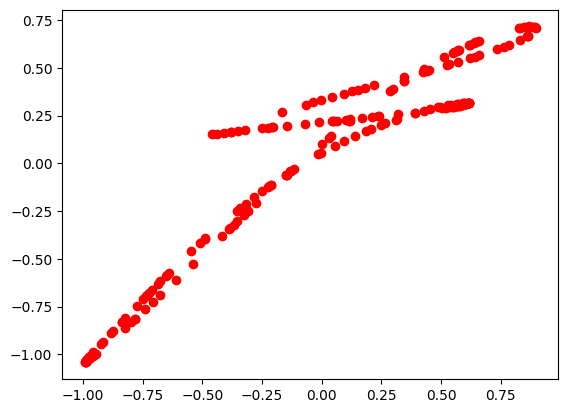

In [76]:
plt.scatter(y_val, y_pred_perc, color='red')

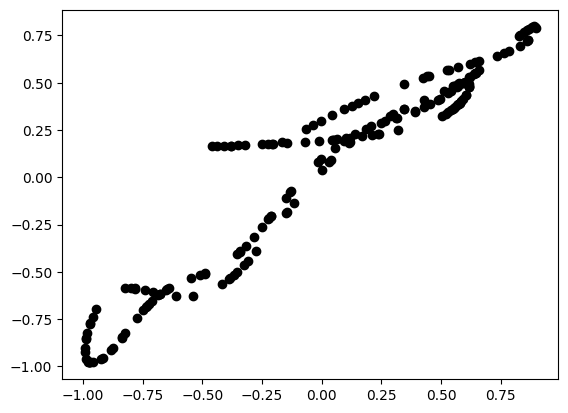

In [78]:
plt.scatter(y_val, y_pred_kan, color='black')